# Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import quandl

%matplotlib inline

In [2]:
import json

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url = btc_url + "?format=json"
btc_data=requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))
btc_content=btc_data['data']['1']['quotes']['USD']['price']

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18960637,
            "total_supply": 18960637,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 43668.0,
                    "volume_24h": 16592523937,
                    "market_cap": 827764359262,
                    "percentage_change_1h": 0.109685645095156,
                    "percentage_change_24h": -0.601248708669383,
                    "percentage_change_7d": -1.61308321177041,
                    "percent_change_1h": 0.109685645095156,
                    "percent_change_24h": -0.601248708669383,
                    "percent_change_7d": -1.61308321177041
                }
            },
            "last_updated": 1645074118
        }
    },
    "metadata": {
        "timestamp": 1645074118,
        "num_c

In [7]:
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url = eth_url + "?format=json"
eth_data=requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))
eth_content=eth_data['data']['1027']['quotes']['USD']['price']

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119613219,
            "total_supply": 119613219,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3068.3,
                    "volume_24h": 12669611054,
                    "market_cap": 367031723760,
                    "percentage_change_1h": -0.519439811201098,
                    "percentage_change_24h": -1.82716369767344,
                    "percentage_change_7d": -5.32636078693349,
                    "percent_change_1h": -0.519439811201098,
                    "percent_change_24h": -1.82716369767344,
                    "percent_change_7d": -5.32636078693349
                }
            },
            "last_updated": 1645074159
        }
    },
    "metadata": {
        "timestamp": 1645074159,
        "num

In [8]:
# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${btc_content:0.2f}")
print(f"The current value of your {ETH} ETH is ${eth_content:0.2f}")

The current value of your 1.2 BTC is $43668.00
The current value of your 5.3 ETH is $3068.30


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")



# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [11]:
# Formatted current date as ISO format
today = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000,
).df

# Preview DataFrame
ticker_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-09-10 00:00:00-04:00  115.99  116.01  115.7801  115.87  2767552  451.04   

                                                            
                             high     low  close    volume  
time                                                        
2021-09-10 00:00:00-04:00  451.49  445.31  445.5  75763259

In [12]:
# AGG and SPY close prices
agg_close_price = float(ticker_data["AGG"]["close"])
spy_close_price = float(ticker_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [13]:
shares_data = {
    "shares": [200, 50]
}
df_shares = pd.DataFrame(shares_data, index=tickers)

In [14]:
# The current value of shares
agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${agg_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${spy_value:0.2f}")

The current value of your 50 SPY shares is $23174.00
The current value of your 200 AGG shares is $22275.00


### Savings Health Analysis

In [15]:
# Set monthly household income
monthly_income=12000

# Consolidated financial assets data
total_crypto=btc_content+eth_content
total_stocks=agg_value+spy_value 
savings_data={"cost":[total_crypto,total_stocks]}
save=["crypto", "stocks"]
# Created savings DataFrame
df_savings = pd.DataFrame(savings_data, index=save)

# Display savings DataFrame
display(df_savings)

,cost
crypto,46736.3
stocks,45449.0


<AxesSubplot:title={'center':'Savings'}, ylabel='cost'>

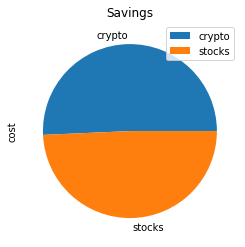

In [16]:
# Plotted savings pie chart
df_savings.plot.pie(y="cost", title='Savings')

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculating total amount of savings
total_savings=total_stocks+total_crypto+emergency_fund
total_savings

128185.3

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [18]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-03', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-03', tz='America/New_York').isoformat()

In [19]:
# Got 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
time                                                                           
2017-10-11 00:00:00-04:00  109.47  109.53  109.42  109.47  1576528.0     NaN   
2017-10-12 00:00:00-04:00  109.56  109.61  109.48  109.61  1797948.0  254.66   
2017-10-13 00:00:00-04:00  109.82  109.87  109.69  109.85  1573645.0  255.14   
2017-10-16 00:00:00-04:00  109.75  109.81  109.66  109.74  3556213.0  255.21   
2017-10-17 00:00:00-04:00  109.62  109.74  109.55  109.70  1638086.0  255.24   

                                                                
                             high      low   close      volume  
time                                                            
2017-10-11 00:00:00-04:00     NaN      NaN     NaN         NaN  
2017-10-12 00:00:00-04:00  255.06  254.365  254.60  32195167.0  
2017-10-13 00:00:00-04:00  255.27  254.640  254.91  33563533.0  
2017-10-16 00:00:00-04:00  255.51  254.820  255.30  25720677.0  
2017-10-17 00:00:00-04:00  255.52  254.980  255.46  23608473.0

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500


MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
time                                                                   
2017-10-11 00:00:00-04:00  109.47  109.53  109.42  109.47  1576528.0   
2017-10-12 00:00:00-04:00  109.56  109.61  109.48  109.61  1797948.0   
2017-10-13 00:00:00-04:00  109.82  109.87  109.69  109.85  1573645.0   
2017-10-16 00:00:00-04:00  109.75  109.81  109.66  109.74  3556213.0   
2017-10-17 00:00:00-04:00  109.62  109.74  109.55  109.70  1638086.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-10-11 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2017-10-12 00:00:00-04:00     0.001279  254.66  255.06  254.365  254.60   
2017-10-13 00:00:00-04:00     0.002190  255.14  255.27  254.640  254.91   
2017-10-16 00:00:00-04:00    -0.001001  255.21  255.51  254.820  255.30   
2017-10-17 00:00:00-04:00    -0.000364  255.24  255.52  254.980  255.46   

                                                    
                               volume daily_return  
time                                                
2017-10-11 00:00:00-04:00         NaN          NaN  
2017-10-12 00:00:00-04:00  32195167.0          NaN  
2017-10-13 00:00:00-04:00  33563533.0     0.001218  
2017-10-16 00:00:00-04:00  25720677.0     0.001530  
2017-10-17 00:00:00-04:00  23608473.0     0.000627

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996682,0.996609,1.006344,1.001930,0.995034,1.003100,1.002601,1.000692,0.989486,0.992561,...,1.008104,1.007410,1.001988,1.003565,0.992884,0.993667,0.996746,0.997148,0.997230,0.998424
2,1.002074,0.992763,1.007835,1.003332,0.994675,1.007545,1.006008,1.005003,0.988641,1.000924,...,1.007713,1.010379,1.014915,1.004179,0.989012,0.995212,0.990565,0.996378,0.981206,0.989601
3,1.011689,0.994666,1.009018,1.004879,0.999056,1.006621,1.011585,1.005420,0.990000,1.000400,...,1.004111,1.013325,1.017324,1.006258,0.997689,0.996910,0.986563,0.999683,0.974871,0.985315
4,0.998907,0.991898,1.007513,1.014644,1.000503,0.995058,1.014431,1.015691,0.988696,0.998844,...,1.013363,1.018082,1.016922,1.010076,0.999705,0.988896,0.980311,0.996567,0.963940,0.987338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.810363,3.664182,7.641397,3.632627,5.355094,8.445154,21.141315,7.149874,7.862121,5.060012,...,12.000709,6.498758,10.967871,10.443445,7.513030,7.221106,6.859766,9.156179,6.797285,3.556898
7557,11.748789,3.656471,7.627586,3.639627,5.374187,8.446956,21.071218,7.069279,7.911586,5.042520,...,11.946046,6.466555,10.953057,10.461929,7.485593,7.207600,6.871574,9.157407,6.797448,3.528942
7558,11.775207,3.662679,7.613213,3.599722,5.365000,8.489204,21.026092,7.110731,7.917018,5.055165,...,12.051587,6.444192,10.939042,10.495731,7.459051,7.238368,6.804484,9.137426,6.822006,3.543645
7559,11.861129,3.614639,7.684993,3.597970,5.342426,8.559118,21.100842,7.033524,7.977560,5.041677,...,12.072220,6.412052,10.868580,10.403944,7.414493,7.277720,6.754785,9.131176,6.869755,3.561772


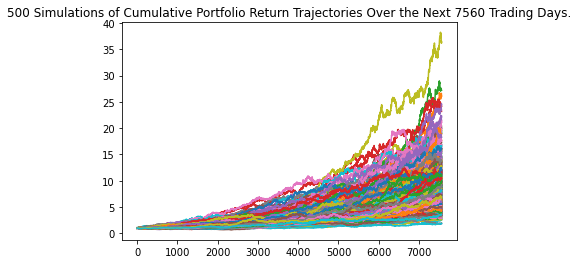

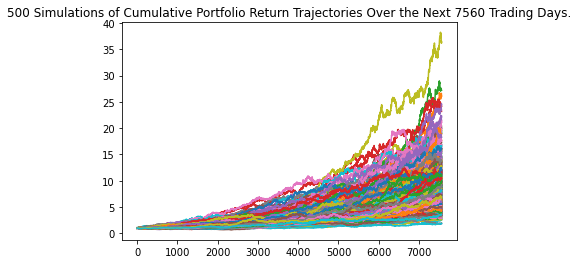

In [23]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()
line_plot.get_figure()

<AxesSubplot:ylabel='Frequency'>

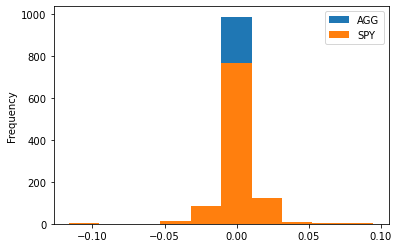

In [24]:
# Plotting probability distribution and confidence intervals

df_closing_prices = pd.DataFrame()


for ticker in tickers:
    df_closing_prices[ticker] = df_stock_data[ticker]["close"]

# Dropped the time component of the date
df_closing_prices.index = df_closing_prices.index.date


# Computing daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.plot.hist()

### Retirement Analysis

In [25]:
# Fetched summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Printing summary statistics
print(tbl)

count           500.000000
mean              8.619714
std               4.369630
min               1.838176
25%               5.599582
50%               7.685350
75%              10.905091
max              36.434648
95% CI Lower      3.020856
95% CI Upper     19.939574
Name: 7560, dtype: float64


### Calculated the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [26]:
# Initial investment
initial_investment = 20000

# Lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $60417.11 and $398791.48


### Calculating the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [27]:
# Set initial investment
initial_investment = 20000 * 1.5

# Used the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $90625.67 and $598187.22
